Step 1: Data Exploration 

In [35]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('mcdonalds.csv')


In [2]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
#displaying the coloumns 
df.columns.to_list()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [4]:
# shape of the datset
df.shape

(1453, 15)

In [6]:
# displaying the first 3 and last 3 row of the data
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [7]:
df.tail(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [8]:
#displaying any 5 random values of the dataset
df.sample(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
47,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+4,66,Once a month,Male
775,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,+2,52,Every three months,Female
100,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,+3,50,Once a month,Male
27,No,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,No,0,34,Once a month,Female
1134,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,I love it!+5,38,Once a month,Female


<Axes: ylabel='count'>

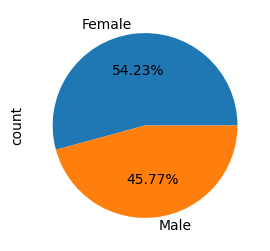

In [45]:
df['Gender'].value_counts().plot(kind = 'pie' , autopct = '%0.2f%%',figsize=(3,3))

In [14]:
#extracting the  11 columns form the dataset and convert it into binary valuse. 1 if yes else 0
new_df = df.iloc[:,0:11].applymap(lambda x: 1 if x == "Yes" else 0)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7480\3716781090.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df = df.iloc[:,0:11].applymap(lambda x: 1 if x == "Yes" else 0)


In [15]:
new_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [16]:
new_df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
new_df_values = new_df.values
new_df_values

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [28]:
# creating an object of PCA class
pca = PCA()
df_pca = pca.fit_transform(new_df_values)

In [30]:
# set the values to 1 decimal
np.set_printoptions(precision= 2)
print(df_pca)

[[-0.43  0.22 -0.66 ... -0.18 -0.52  0.57]
 [ 0.22 -0.39  0.73 ... -0.11 -0.49  0.5 ]
 [-0.38 -0.73  0.12 ...  0.32 -0.06 -0.24]
 ...
 [ 0.19 -1.06 -0.22 ... -0.04 -0.06  0.01]
 [ 1.18  0.04 -0.56 ... -0.02  0.    0.11]
 [-1.55 -0.28  0.01 ...  0.14  0.43  0.46]]


In [56]:
# Getting the rotation (loadings) matrix 
rotation_matrix = pca.components_
# Printing the rotation matrix with dimensions (11 x 11) rounded to 1 decimal place 
np.set_printoptions(precision=1) 
print(rotation_matrix)

[[ 0.5  0.2  0.  -0.1 -0.3  0.1  0.3  0.5 -0.3  0.2 -0.4]
 [-0.4 -0.  -0.   0.   0.1  0.1  0.6 -0.3 -0.6 -0.1  0.1]
 [ 0.3  0.1  0.   0.3  0.8  0.1  0.1  0.3 -0.  -0.2  0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [ 0.3 -0.3 -0.1  0.1 -0.4 -0.1  0.1  0.2  0.  -0.3  0.7]
 [-0.2  0.3  0.4  0.4 -0.2  0.6  0.1  0.1  0.3  0.2  0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [-0.   0.1 -0.4 -0.6  0.1  0.6 -0.1  0.1 -0.  -0.2  0.2]
 [-0.6  0.  -0.4  0.2  0.  -0.2 -0.1  0.6 -0.1  0.2  0.1]
 [ 0.1  0.7  0.1  0.  -0.  -0.2 -0.4 -0.1 -0.5  0.   0.3]
 [-0.   0.5 -0.1 -0.3 -0.  -0.3  0.5 -0.   0.5 -0.2  0. ]]


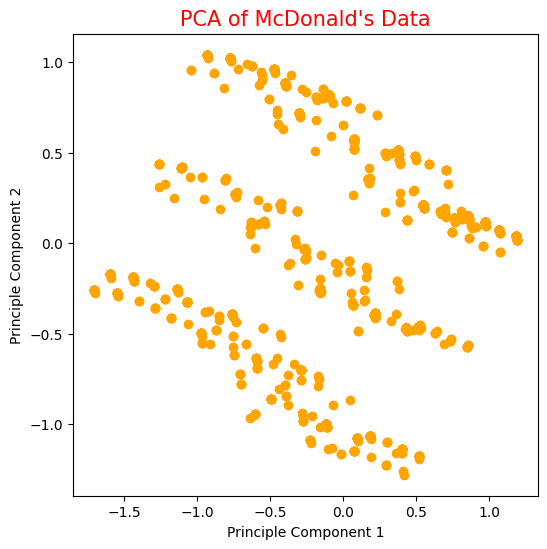

In [57]:
plt.figure(figsize = (6,6))
plt.scatter(df_pca[:,0] , df_pca[:,1],color = 'Orange')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("PCA of McDonald's Data",fontsize = 15,color = 'red')
plt.show()

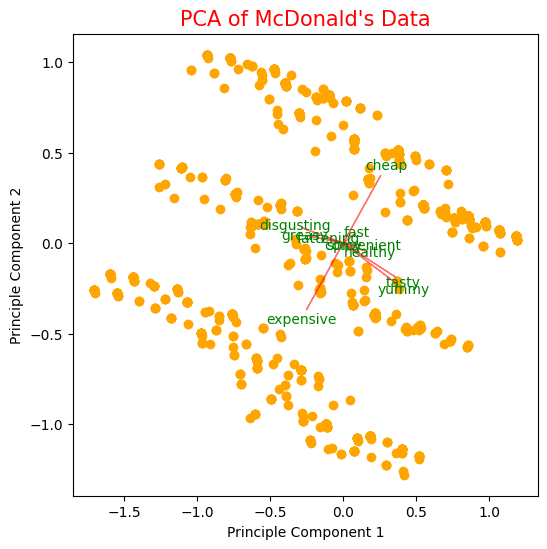

In [58]:
def draw_projection(pca , new_df):
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    for i , (name , vactor) in enumerate(zip(new_df.columns , loadings)):
        plt.arrow(0, 0, vactor[0], vactor[1] ,color ='r',alpha = 0.5)
        plt.text(vactor[0]*1.15 , vactor[1]*1.15 , name , color = 'g', ha = 'center', va = 'center')

plt.figure(figsize = (6,6))
plt.scatter(df_pca[:,0] , df_pca[:,1],color = 'Orange')
draw_projection(pca , new_df)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("PCA of McDonald's Data",fontsize = 15,color = 'red')
plt.show()
